In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import datetime

## Load TensorBoard

In [3]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 596), started 0:00:43 ago. (Use '!kill 596' to kill it.)

## Load and Process Data

In [12]:
df = pd.read_csv(r'D:\Github\Projects\Dota_Winrate_Analysis\Data\Export\200k matches export.csv')
df.drop(df.loc[df['game_mode'] != 22].index,inplace=True )
df['Radiant']='R'+df['player_1'].map(str)+','+'R'+df['player_2'].map(str)+','+'R'+df['player_3'].map(str)+','+'R'+df['player_4'].map(str)+','+'R'+df['player_5'].map(str)
df['Dire']='D'+df['player_6'].map(str)+','+'D'+df['player_7'].map(str)+','+'D'+df['player_8'].map(str)+','+'D'+df['player_9'].map(str)+','+'D'+df['player_10'].map(str)
Radiant = df['Radiant'].str.get_dummies(sep=',')
Dire = df['Dire'].str.get_dummies(sep=',')
dfmodel = Radiant.join(Dire)
dfmodel['Radiant Win'] = df['radiant_win'].astype(int)

We want to check the radiant winrate, our goal is to create a model that's better than this mean.

In [134]:
df.radiant_win.mean()

0.523359307767574

## Train Test Split

In [13]:
Train, Test = train_test_split(dfmodel, test_size=0.2,random_state=1)
xTrain = Train.drop(labels = 'Radiant Win',axis=1)
xTest = Test.drop(labels = 'Radiant Win',axis=1)
yTrain = Train['Radiant Win']
yTest = Test['Radiant Win']
xTrain, yTrain, xTest, yTest

(        R1  R10  R100  R101  R102  R103  R104  R105  R106  R107  ...  D90  \
 55726    0    0     1     0     0     0     0     0     1     0  ...    0   
 50673    0    0     0     0     0     0     1     0     0     0  ...    0   
 97216    1    0     0     0     0     0     0     0     0     0  ...    0   
 52862    0    0     0     0     0     0     1     0     0     0  ...    0   
 109272   1    0     0     0     0     0     0     0     0     0  ...    0   
 ...     ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
 29611    0    0     0     0     0     0     0     0     0     1  ...    0   
 100529   0    0     0     0     0     0     0     0     0     0  ...    0   
 68547    0    0     1     0     0     0     0     0     0     0  ...    0   
 7156     1    0     0     0     0     0     0     0     0     0  ...    0   
 106621   0    0     0     0     0     0     0     0     0     0  ...    0   
 
         D91  D92  D93  D94  D95  D96  D97  D98  D99  
 55726 

In [123]:
Xtrain_R= xTrain.iloc[:,:119]
Xtrain_D= xTrain.iloc[:,119:]
ytrain_Tanh = yTrain.replace(0,-1)
ytest_Tanh = yTest.replace(0,-1)

Xtrain_R, Xtrain_D, ytrain_Tanh, ytest_Tanh

(        R1  R10  R100  R101  R102  R103  R104  R105  R106  R107  ...  R90  \
 55726    0    0     1     0     0     0     0     0     1     0  ...    0   
 50673    0    0     0     0     0     0     1     0     0     0  ...    0   
 97216    1    0     0     0     0     0     0     0     0     0  ...    0   
 52862    0    0     0     0     0     0     1     0     0     0  ...    0   
 109272   1    0     0     0     0     0     0     0     0     0  ...    0   
 ...     ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
 29611    0    0     0     0     0     0     0     0     0     1  ...    0   
 100529   0    0     0     0     0     0     0     0     0     0  ...    0   
 68547    0    0     1     0     0     0     0     0     0     0  ...    0   
 7156     1    0     0     0     0     0     0     0     0     0  ...    0   
 106621   0    0     0     0     0     0     0     0     0     0  ...    0   
 
         R91  R92  R93  R94  R95  R96  R97  R98  R99  
 55726 

## Model Creation and Tuning

In [124]:
#MODEL V1
log_dir = r"logs/fit/1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=50, batch_size=1000,validation_data=(xTest, yTest), callbacks=[tensorboard_callback])
scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)

Train on 67861 samples, validate on 16966 samples
Epoch 1/50
67861/67861 [==============================] - 1s 15us/sample - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6899 - val_accuracy: 0.5325
Epoch 2/50
67861/67861 [==============================] - 0s 6us/sample - loss: 0.6881 - accuracy: 0.5385 - val_loss: 0.6867 - val_accuracy: 0.5456
Epoch 3/50
67861/67861 [==============================] - 0s 6us/sample - loss: 0.6837 - accuracy: 0.5567 - val_loss: 0.6837 - val_accuracy: 0.5566
Epoch 4/50
67861/67861 [==============================] - 0s 6us/sample - loss: 0.6798 - accuracy: 0.5677 - val_loss: 0.6826 - val_accuracy: 0.5572
Epoch 5/50
67861/67861 [==============================] - 0s 6us/sample - loss: 0.6772 - accuracy: 0.5729 - val_loss: 0.6822 - val_accuracy: 0.5602
Epoch 6/50
67861/67861 [==============================] - 0s 6us/sample - loss: 0.6755 - accuracy: 0.5752 - val_loss: 0.6821 - val_accuracy: 0.5602
Epoch 7/50
67861/67861 [==============================] - 0s 

Something about this model has a limit on the accuracy growth of the training data, therefor giving us less accuracy overall. Could this be because of overfitting?

In [125]:
#MODEL V1.1 (changed validation_data to validation)
log_dir = r"logs/fit/1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=50, batch_size=1000,validation_split=0.1,shuffle = True, callbacks=[tensorboard_callback])
scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)

Train on 61074 samples, validate on 6787 samples
Epoch 1/50
61074/61074 [==============================] - 1s 15us/sample - loss: 0.6925 - accuracy: 0.5177 - val_loss: 0.6913 - val_accuracy: 0.5269
Epoch 2/50
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6894 - accuracy: 0.5331 - val_loss: 0.6900 - val_accuracy: 0.5332
Epoch 3/50
61074/61074 [==============================] - 1s 8us/sample - loss: 0.6857 - accuracy: 0.5482 - val_loss: 0.6886 - val_accuracy: 0.5409
Epoch 4/50
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6812 - accuracy: 0.5644 - val_loss: 0.6870 - val_accuracy: 0.5471
Epoch 5/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6777 - accuracy: 0.5727 - val_loss: 0.6868 - val_accuracy: 0.5537
Epoch 6/50
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6751 - accuracy: 0.5777 - val_loss: 0.6872 - val_accuracy: 0.5506
Epoch 7/50
61074/61074 [==============================] - 0s 5

The previous model used our testing data to validate the model, which is a mistake.

In [126]:
#model 2 Added dropout layers
log_dir = r"logs/fit/2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=50, batch_size=1000,validation_split=0.1,shuffle = True, callbacks=[tensorboard_callback])
scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)

Train on 61074 samples, validate on 6787 samples
Epoch 1/50
61074/61074 [==============================] - 1s 19us/sample - loss: 0.6958 - accuracy: 0.5090 - val_loss: 0.6914 - val_accuracy: 0.5259
Epoch 2/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6920 - accuracy: 0.5218 - val_loss: 0.6908 - val_accuracy: 0.5301
Epoch 3/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6899 - accuracy: 0.5320 - val_loss: 0.6898 - val_accuracy: 0.5312
Epoch 4/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6881 - accuracy: 0.5386 - val_loss: 0.6883 - val_accuracy: 0.5359
Epoch 5/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6862 - accuracy: 0.5479 - val_loss: 0.6870 - val_accuracy: 0.5446
Epoch 6/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6835 - accuracy: 0.5577 - val_loss: 0.6864 - val_accuracy: 0.5512
Epoch 7/50
61074/61074 [==============================] - 0s 6

In [127]:
#model 3, added early stop callback
log_dir = r"logs/fit/3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

X= xTrain
Y= yTrain
model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=50, batch_size=1000,validation_split=0.1,shuffle = True, 
          callbacks=[tensorboard_callback, es_callback])
scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)

Train on 61074 samples, validate on 6787 samples
Epoch 1/50
61074/61074 [==============================] - 1s 14us/sample - loss: 0.6956 - accuracy: 0.5049 - val_loss: 0.6908 - val_accuracy: 0.5320
Epoch 2/50
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6920 - accuracy: 0.5209 - val_loss: 0.6902 - val_accuracy: 0.5326
Epoch 3/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6909 - accuracy: 0.5274 - val_loss: 0.6894 - val_accuracy: 0.5338
Epoch 4/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6888 - accuracy: 0.5392 - val_loss: 0.6878 - val_accuracy: 0.5444
Epoch 5/50
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6862 - accuracy: 0.5472 - val_loss: 0.6859 - val_accuracy: 0.5421
Epoch 6/50
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6833 - accuracy: 0.5563 - val_loss: 0.6847 - val_accuracy: 0.5457
Epoch 7/50
61074/61074 [==============================] - 0s 6

In [19]:
#model 4 added unit_norm constraint to first layer, increased dropout and lowered neuron density
log_dir = r"logs/fit/4/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

X= xTrain
Y= yTrain
model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu', kernel_constraint = tf.keras.constraints.unit_norm()))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=500, batch_size=1000,validation_split=0.1,shuffle = True, 
          callbacks=[tensorboard_callback, es_callback])
scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)
model.summary()

Train on 61074 samples, validate on 6787 samples
Epoch 1/500
61074/61074 [==============================] - 1s 17us/sample - loss: 0.6987 - accuracy: 0.4975 - val_loss: 0.6918 - val_accuracy: 0.5319
Epoch 2/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6925 - accuracy: 0.5179 - val_loss: 0.6912 - val_accuracy: 0.5306
Epoch 3/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6919 - accuracy: 0.5216 - val_loss: 0.6908 - val_accuracy: 0.5325
Epoch 4/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6910 - accuracy: 0.5263 - val_loss: 0.6903 - val_accuracy: 0.5320
Epoch 5/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6900 - accuracy: 0.5298 - val_loss: 0.6895 - val_accuracy: 0.5365
Epoch 6/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6882 - accuracy: 0.5398 - val_loss: 0.6882 - val_accuracy: 0.5410
Epoch 7/500
61074/61074 [==============================]

In [129]:
#model 5, Hyperbolic tangent activation function 
log_dir = r"logs/fit/5/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu', kernel_constraint = tf.keras.constraints.unit_norm()))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=500, batch_size=1000,validation_split=0.1,shuffle = True, 
          callbacks=[tensorboard_callback, es_callback])
scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)
model.summary()

Train on 61074 samples, validate on 6787 samples
Epoch 1/500
61074/61074 [==============================] - 1s 16us/sample - loss: 1.2347 - accuracy: 0.5029 - val_loss: 0.7176 - val_accuracy: 0.5158
Epoch 2/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.8997 - accuracy: 0.5084 - val_loss: 0.7053 - val_accuracy: 0.5226
Epoch 3/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.8324 - accuracy: 0.5126 - val_loss: 0.7004 - val_accuracy: 0.5229
Epoch 4/500
61074/61074 [==============================] - 0s 6us/sample - loss: 0.8013 - accuracy: 0.5110 - val_loss: 0.6969 - val_accuracy: 0.5213
Epoch 5/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.7884 - accuracy: 0.5113 - val_loss: 0.6956 - val_accuracy: 0.5206
Epoch 6/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.7667 - accuracy: 0.5192 - val_loss: 0.6930 - val_accuracy: 0.5282
Epoch 7/500
61074/61074 [==============================]

In [ ]:
#model 6; reverted to model 4 and reduced batch size
log_dir = r"logs/fit/6/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000)
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 0)


model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu', kernel_constraint = tf.keras.constraints.unit_norm()))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=500, batch_size=10,validation_split=0.1,shuffle = True, 
          callbacks=[tensorboard_callback, es_callback])

scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)
model.summary()

## Final Model

In [17]:
log_dir = r"logs/fit/final/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +'/'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 1000000)
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

### Model
model = tf.keras.Sequential()
model.add(layers.Dense(16, input_shape=(238,), activation='relu', kernel_constraint = tf.keras.constraints.unit_norm()))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(rate=0.4))
model.add(layers.Dense(1, activation='sigmoid'))
###

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(xTrain, yTrain, epochs=500, batch_size=1000,validation_split=0.1,shuffle = True, 
          callbacks=[tensorboard_callback, es_callback])

scores, acc = model.evaluate(xTest, yTest)
print('Test score:', scores)
print('Test accuracy:', acc)
model.summary()

Train on 61074 samples, validate on 6787 samples
Epoch 1/500
61074/61074 [==============================] - 1s 16us/sample - loss: 0.6954 - accuracy: 0.5069 - val_loss: 0.6917 - val_accuracy: 0.5266
Epoch 2/500
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6926 - accuracy: 0.5171 - val_loss: 0.6913 - val_accuracy: 0.5295
Epoch 3/500
61074/61074 [==============================] - 0s 8us/sample - loss: 0.6923 - accuracy: 0.5191 - val_loss: 0.6909 - val_accuracy: 0.5298
Epoch 4/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6913 - accuracy: 0.5210 - val_loss: 0.6904 - val_accuracy: 0.5295
Epoch 5/500
61074/61074 [==============================] - 0s 6us/sample - loss: 0.6906 - accuracy: 0.5242 - val_loss: 0.6897 - val_accuracy: 0.5307
Epoch 6/500
61074/61074 [==============================] - 0s 7us/sample - loss: 0.6897 - accuracy: 0.5282 - val_loss: 0.6890 - val_accuracy: 0.5335
Epoch 7/500
61074/61074 [==============================]

## Model Prediction

In [21]:
model.evaluate(xTest,  yTest, verbose=2)
ypredict = model.predict(xTest)
ypredict_binary = [1 if n >= 0.5 else 0 for n in ypredict]
ypredict, yTest, ypredict_binary

16966/16966 - 0s - loss: 0.6829 - accuracy: 0.5570


(array([[0.6349816 ],
        [0.5155861 ],
        [0.49732974],
        ...,
        [0.4339934 ],
        [0.6201401 ],
        [0.4790317 ]], dtype=float32),
 9376      0
 58397     0
 66161     0
 18196     1
 23911     1
          ..
 92831     1
 111126    0
 88802     1
 4458      1
 45583     0
 Name: Radiant Win, Length: 16966, dtype: int32,
 [1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
 

## Confusion Matrix and Analysis

In [22]:
from sklearn.metrics import confusion_matrix
#TP,FP
#FN,TN
confusion = confusion_matrix(yTest, ypredict_binary)
TP = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TN = confusion[1,1]
Recall = (TP/(TP+FN)) #out of the positive classes, how many we predict correct
Precision = (TP/(TP+FP)) #Out of all the positive classes we have predicted correctly, how many are actually positive.
#Low Precision emerges when very few of your positive predictions are true.
print ('Recall: '+ str(Recall))
print ('Precision: ' + str(Precision))
confusion

Recall: 0.5420412480169222
Precision: 0.3847116226698361


array([[3075, 4918],
       [2598, 6375]], dtype=int64)

## Regression Plot

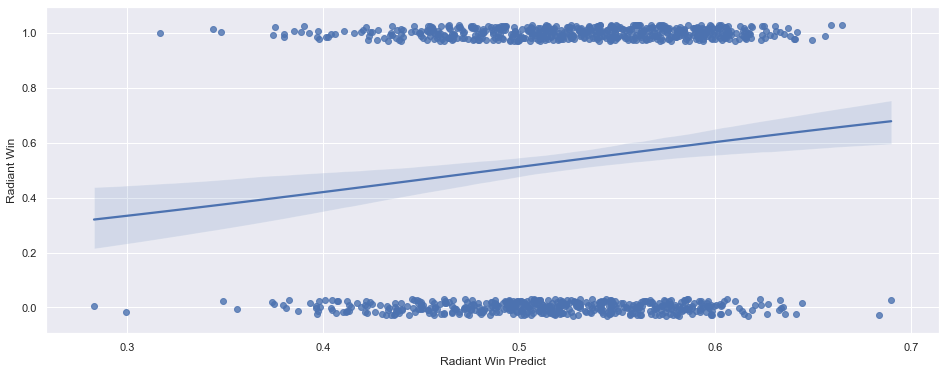

In [23]:
#Graph to show how accuracy increases/decreases as Probability changes 
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt 
%matplotlib inline
predictdf = pd.DataFrame(data = ypredict, columns=['Radiant Win Predict'])
Truedf = pd.DataFrame(data = yTest).reset_index(drop=True)
dfpredictgraph = pd.concat([Truedf, predictdf], axis=1)
plt.figure(figsize=(16, 6))

dfpredictgraph_sample=dfpredictgraph.sample(1000)

ax = sns.regplot(x ="Radiant Win Predict", y = 'Radiant Win', data = dfpredictgraph_sample,logistic=True, y_jitter=.03)

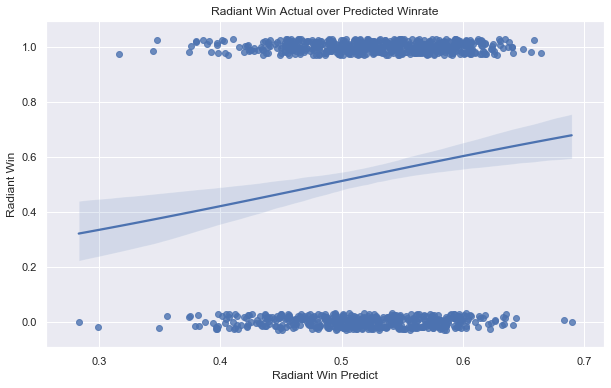

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x ="Radiant Win Predict", y = 'Radiant Win', data = dfpredictgraph_sample,logistic=True, y_jitter=.03).set_title("Radiant Win Actual over Predicted Winrate")